In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df=pd.read_csv("data.csv")
df.head()

,Concentration,FREQ[Hz],e',"e"""
0,0.0,20.0000,231.533263,37930.09417
1,0.0,21.1851,209.517273,35875.78238
2,0.0,22.4404,192.168742,33945.73225
3,0.0,23.7700,174.917445,32113.45936
4,0.0,25.1785,159.518876,30377.52578


In [3]:
df.describe()

,Concentration,FREQ[Hz],e',"e"""
count,3618.000000,3.618000e+03,3618.000000,3618.000000
mean,0.428333,1.778746e+05,12.839909,946.521864
std,0.278651,3.890976e+05,12.868103,3318.428102
min,0.000000,2.000000e+01,1.676067,-0.763485
25%,0.190000,3.556560e+02,7.588997,0.431308
50%,0.415000,6.324560e+03,11.321646,9.037004
75%,0.650000,1.124680e+05,14.991698,208.125955
max,1.000000,2.000000e+06,231.533263,37930.094170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3618 entries, 0 to 3617
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Concentration  3618 non-null   float64
 1   FREQ[Hz]       3618 non-null   float64
 2   e'             3618 non-null   float64
 3   e"             3618 non-null   float64
dtypes: float64(4)
memory usage: 113.2 KB


In [5]:
df.isnull().sum()

Concentration    0
FREQ[Hz]         0
e'               0
e"               0
dtype: int64

In [29]:
df.corr()

,Concentration,FREQ[Hz],e',"e"""
Concentration,1.000000e+00,-1.160705e-16,-0.496372,-0.288494
FREQ[Hz],-1.160705e-16,1.000000e+00,-0.072130,-0.130261
e',-4.963725e-01,-7.212995e-02,1.000000,0.908579
"e""",-2.884939e-01,-1.302608e-01,0.908579,1.000000


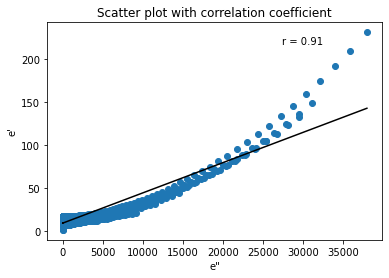

Text(0.5, 17.200000000000003, 'e"') Text(17.200000000000003, 0.5, "e'") None


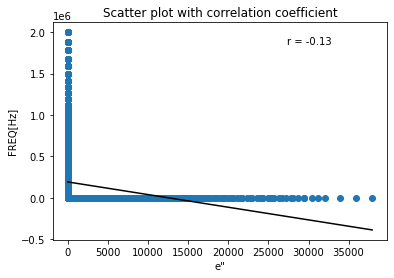

Text(0.5, 17.200000000000003, 'e"') Text(17.200000000000003, 0.5, 'FREQ[Hz]') None


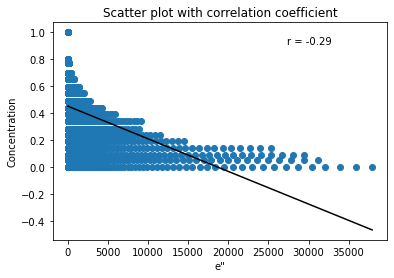

Text(0.5, 17.200000000000003, 'e"') Text(17.200000000000003, 0.5, 'Concentration') None


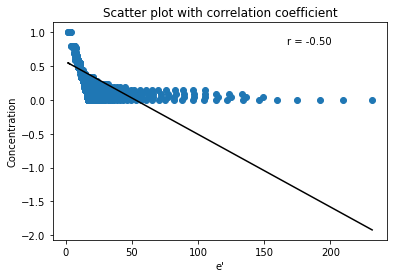

Text(0.5, 17.200000000000003, "e'") Text(17.200000000000003, 0.5, 'Concentration') None


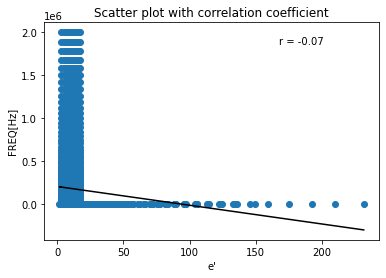

Text(0.5, 17.200000000000003, "e'") Text(17.200000000000003, 0.5, 'FREQ[Hz]') None


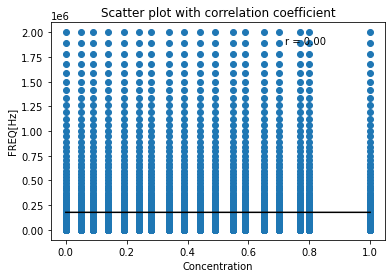

Text(0.5, 17.200000000000003, 'Concentration') Text(17.200000000000003, 0.5, 'FREQ[Hz]') None


In [6]:
# correlation
def corr_reg_r(x,y):
  plt.scatter(x, y)

  #regression line
  b, a = np.polyfit(x, y, deg=1)

  #r value
  r, p = stats.pearsonr(x, y)
  plt.annotate('r = {:.2f}'.format(r), xy=(0.7, 0.9), xycoords='axes fraction')


  #label the plot

  plt.title('Scatter plot with correlation coefficient')
  
  plt.plot(x, b*x+a,color="black")

  plt.show()

print(plt.xlabel('e"')
      ,plt.ylabel("e'"),
      corr_reg_r(df['e"'],df["e'"])
      )
print(plt.xlabel('e"')
      ,plt.ylabel("FREQ[Hz]"),
      corr_reg_r(df['e"'],df["FREQ[Hz]"]))
print(plt.xlabel('e"')
      ,plt.ylabel("Concentration"),
      corr_reg_r(df['e"'],df["Concentration"]))
print(plt.xlabel("e'")
      ,plt.ylabel("Concentration"),
      corr_reg_r(df["e'"],df["Concentration"]))
print(plt.xlabel("e'")
      ,plt.ylabel("FREQ[Hz]"),
      corr_reg_r(df["e'"],df["FREQ[Hz]"]))
print(plt.xlabel("Concentration")
      ,plt.ylabel("FREQ[Hz]"),
      corr_reg_r(df["Concentration"],df["FREQ[Hz]"]))

In [ ]:
#check duplicate
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :",duplicate)

In [7]:
#normalise
#frequency
freq=(df["FREQ[Hz]"]- df["FREQ[Hz]"].min()) / (df["FREQ[Hz]"].max() - df["FREQ[Hz]"].min())
#e'
e_new=(df["e'"] - df["e'"].min()) / (df["e'"].max() - df["e'"].min())


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_e_dp = scaler.fit_transform([[x] for x in df['e"']])

#drop the unwanted data
df=df.drop(['e"',"e'","FREQ[Hz]"],axis=1)

df["FREQ[Hz]"]=freq
df["e'"]=e_new
df['e"']=scaled_e_dp
df.head()

,Concentration,FREQ[Hz],e',"e"""
0,0.0,0.000000e+00,1.000000,1.000000
1,0.0,5.925559e-07,0.904219,0.891681
2,0.0,1.220212e-06,0.828744,0.789914
3,0.0,1.885019e-06,0.753691,0.693303
4,0.0,2.589276e-06,0.686699,0.601772


In [8]:
df.describe()

,Concentration,FREQ[Hz],e',"e"""
count,3618.000000,3618.000000,3618.000000,3618.000000
mean,0.428333,0.088928,0.048569,-0.950052
std,0.278651,0.194551,0.055983,0.174972
min,0.000000,0.000000,0.000000,-1.000000
25%,0.190000,0.000168,0.025724,-0.999937
50%,0.415000,0.003152,0.041963,-0.999483
75%,0.650000,0.056225,0.057930,-0.988986
max,1.000000,1.000000,1.000000,1.000000


In [9]:
#df.to_csv("cleaned_data.csv")

<h2>XGBoost</h2>

In [12]:
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import accuracy_score   
from sklearn.metrics import  r2_score
from sklearn.multioutput import MultiOutputRegressor

X=df.iloc[:, [0,1]].values  
y=df.iloc[:, [2,3]].values

# Splitting 
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                      test_size = 0.3, random_state = 123) 
  
# Instantiation 
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 

# multiple output
multioutput_regressor = MultiOutputRegressor(xgb_r)

# Fitting the model 
multioutput_regressor.fit(train_X,train_y) 
  
# Predict the model 
pred = multioutput_regressor.predict(test_X) 

# RMSE Computation 
rmse = np.sqrt(MSE(test_y, pred)) 
mse = MSE(test_y, pred)
r2 = r2_score(test_y, pred)
print("RMSE : % f" %(rmse)) 
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


RMSE :  0.011036
Mean Squared Error (MSE): 0.00012178471040109018
R-squared: 0.9896251040136261


C:\Users\hp\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:07:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


<h2>Linear regression</h2>

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

multioutput_regressor = MultiOutputRegressor(regr)
multioutput_regressor.fit(train_X,train_y) 
  
# Predict the model 
pred = multioutput_regressor.predict(test_X)
print("prediction:", pred)

mse = MSE(test_y, pred)
r2 = r2_score(test_y, pred)
rmse = np.sqrt(MSE(test_y, pred)) 
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print("RMSE : % f" %(rmse))

prediction: [[ 0.02300927 -0.99037755]
 [ 0.06418096 -0.93740145]
 [ 0.08500169 -0.8800569 ]
 ...
 [-0.00779191 -1.04633014]
 [ 0.08547292 -0.87750357]
 [ 0.0753758  -0.89523365]]
Mean Squared Error (MSE): 0.012104568073036719
R-squared: 0.21290306911634055
RMSE :  0.110021


<h2>Random forest regression (on Both target values together)</h2>

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor
(n_estimators=10, random_state=10, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(train_X,train_y)

from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(test_X)
print("prediction: ", predictions)
# Evaluating the model
mse = mean_squared_error(test_y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(test_y, predictions)
print(f'R-squared: {r2}')

rmse = np.sqrt(MSE(test_y, predictions)) 
print("RMSE : % f" %(rmse))

Out-of-Bag Score: 0.8202550151678529
prediction:  [[ 0.02337938 -0.99830007]
 [ 0.05203052 -0.99993653]
 [ 0.06215295 -0.99935107]
 ...
 [ 0.00482282 -0.99996045]
 [ 0.06234502 -0.99760444]
 [ 0.09358608 -0.62800376]]
Mean Squared Error: 6.22999246129268e-05
R-squared: 0.9927674785169756
RMSE :  0.007893


C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


<h2> Random Forest Regressor (On individual target variables)</h2>

In [25]:

data = pd.read_csv('cleaned_data.csv')

# Assuming 'e'' and 'e"' are the target variables and 'Concentration', 'FREQ[Hz]' are features
X = data[['Concentration', 'FREQ[Hz]']]
y = data[['e\'', 'e"']]  # Target variables 'e'' and 'e"'

# Split the data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split
(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regression model for 'e\''
rf_model_e1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_e1.fit(X_train, y_train['e\''])

# Make predictions for 'e\''
predictions_e1 = rf_model_e1.predict(X_test)

# Initialize and fit the Random Forest Regression model for 'e\"'
rf_model_e2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_e2.fit(X_train, y_train['e"'])

# Make predictions for 'e\"'
predictions_e2 = rf_model_e2.predict(X_test)

# Calculate metrics for 'e\''
mse_e1 = mean_squared_error(y_test['e\''], predictions_e1)
r2_e1 = r2_score(y_test['e\''], predictions_e1)
rmse_e1 = np.sqrt(mean_squared_error(y_test['e\''], predictions_e1))


# Calculate metrics for 'e\"'
mse_e2 = mean_squared_error(y_test['e"'], predictions_e2)
r2_e2 = r2_score(y_test['e"'], predictions_e2)
rmse_e2 = np.sqrt(mean_squared_error(y_test['e"'], predictions_e2))


print("Metrics for e':")
print(f"Mean Squared Error (MSE): {mse_e1}")
print(f"R-squared: {r2_e1}")
print("RMSE : % f" %(rmse_e1)) 

print("\nMetrics for e\":")
print(f"Mean Squared Error (MSE): {mse_e2}")
print(f"R-squared: {r2_e2}")
print("RMSE : % f" %(rmse_e2)) 


Metrics for e':
Mean Squared Error (MSE): 3.657476804753659e-05
R-squared: 0.9901788490048588
RMSE :  0.006048

Metrics for e":
Mean Squared Error (MSE): 0.00010379695540042654
R-squared: 0.9971778169885668
RMSE :  0.010188


<h2>Gradient Boosting Regression</h2>

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Load your dataset (make sure to upload your dataset to Colab first)
data = pd.read_csv('cleaned_data.csv')

# Assuming 'e\'' and 'e"' are the target variables and 'Concentration', 'FREQ[Hz]' are features
X = data[['Concentration', 'FREQ[Hz]']]
y = data[['e\'', 'e"']]  # Target variables 'e\'' and 'e"'

# Split the data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting Regression model for 'e\''
gbr_model_e1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model_e1.fit(X_train, y_train['e\''])

# Make predictions for 'e\''
predictions_e1 = gbr_model_e1.predict(X_test)

# Initialize and fit the Gradient Boosting Regression model for 'e\"'
gbr_model_e2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model_e2.fit(X_train, y_train['e"'])

# Make predictions for 'e\"'
predictions_e2 = gbr_model_e2.predict(X_test)

# Calculate metrics for 'e\''
mse_e1 = mean_squared_error(y_test['e\''], predictions_e1)
r2_e1 = r2_score(y_test['e\''], predictions_e1)
rmse_e1 = np.sqrt(mean_squared_error(y_test['e\''], predictions_e1))

# Calculate metrics for 'e\"'
mse_e2 = mean_squared_error(y_test['e"'], predictions_e2)
r2_e2 = r2_score(y_test['e"'], predictions_e2)
rmse_e2 = np.sqrt(mean_squared_error(y_test['e"'], predictions_e2))

print("Metrics for e':")
print(f"Mean Squared Error (MSE): {mse_e1}")
print(f"R-squared: {r2_e1}")
print("RMSE : % f" %(rmse_e1)) 

print("\nMetrics for e\":")
print(f"Mean Squared Error (MSE): {mse_e2}")
print(f"R-squared: {r2_e2}")
print("RMSE : % f" %(rmse_e2)) 

#for both

gbr= GradientBoostingRegressor
(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model = MultiOutputRegressor(gbr)
gbr_model.fit(X_train, y_train)

# Make predictions for 'e\''
predictions = gbr_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("\nMetrics :")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print("RMSE : % f" %(rmse))

Metrics for e':
Mean Squared Error (MSE): 1.65931025783402e-05
R-squared: 0.995544377323516
RMSE :  0.004073

Metrics for e":
Mean Squared Error (MSE): 9.246169774562093e-05
R-squared: 0.997486016506175
RMSE :  0.009616

Metrics :
Mean Squared Error (MSE): 5.4527400161980566e-05
R-squared: 0.9965151969148455
RMSE :  0.007384
